# CS 4820
# Assignment 5: Multi-Class Classification, Data Pre-processing, and Model Analysis

# Due: 2:00pm October 9, 2019

In this assignment, you are asked to build an ANN model to classify wines in the "*wines*" dataset into three mutually exclusice classes. Treat the first column in the data set as the target column.

Use __Tutorial 6__ as your reference when working on this assignment.

### 0. The *wines* Dataset and Data Preprocessing


In [1]:
# your code here ...
import numpy as np
import pandas as pd

df = pd.read_csv('data/wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from tensorflow.keras.utils import to_categorical

targets = df['Class'].unique()
target_dict = {n:i for i, n in enumerate(targets)}
y = df['Class'].map(target_dict)
y_cat = to_categorical(y)

X = df.drop('Class', axis=1).values

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state = 0, stratify = y_cat)
print(X_train.shape)
print(y_train.shape)
print(y_train[:5])

(142, 13)
(142, 3)
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


### 1. Multi-Class Classification Model


In [7]:
# your code here ...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(3, input_dim=13, activation='softmax'))
model.compile(optimizer='Adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=2, batch_size=2)

Epoch 1/100
142/142 - 0s - loss: 2.2543 - accuracy: 0.2394
Epoch 2/100
142/142 - 0s - loss: 1.8033 - accuracy: 0.3380
Epoch 3/100
142/142 - 0s - loss: 1.4329 - accuracy: 0.4507
Epoch 4/100
142/142 - 0s - loss: 1.1323 - accuracy: 0.5493
Epoch 5/100
142/142 - 0s - loss: 0.9016 - accuracy: 0.6056
Epoch 6/100
142/142 - 0s - loss: 0.7279 - accuracy: 0.6690
Epoch 7/100
142/142 - 0s - loss: 0.5971 - accuracy: 0.7394
Epoch 8/100
142/142 - 0s - loss: 0.5014 - accuracy: 0.8169
Epoch 9/100
142/142 - 0s - loss: 0.4313 - accuracy: 0.8592
Epoch 10/100
142/142 - 0s - loss: 0.3758 - accuracy: 0.8944
Epoch 11/100
142/142 - 0s - loss: 0.3334 - accuracy: 0.9225
Epoch 12/100
142/142 - 0s - loss: 0.2992 - accuracy: 0.9437
Epoch 13/100
142/142 - 0s - loss: 0.2716 - accuracy: 0.9577
Epoch 14/100
142/142 - 0s - loss: 0.2484 - accuracy: 0.9718
Epoch 15/100
142/142 - 0s - loss: 0.2291 - accuracy: 0.9718
Epoch 16/100
142/142 - 0s - loss: 0.2125 - accuracy: 0.9718
Epoch 17/100
142/142 - 0s - loss: 0.1978 - accura

In [8]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

### 2. Model Analysis

In [9]:
# your code here ...
from sklearn.metrics import classification_report

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
import collections

cm = confusion_matrix(y_test_class, y_pred_class)
pd.DataFrame(cm, index=targets, columns=targets)

,1,2,3
1,12,0,0
2,0,14,0
3,0,0,10


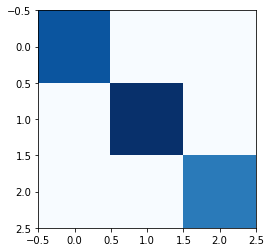

In [12]:
import matplotlib.pyplot as plt

plt.imshow(cm, cmap='Blues')

Text(0.5, 0.98, 'The Wines Dataset')

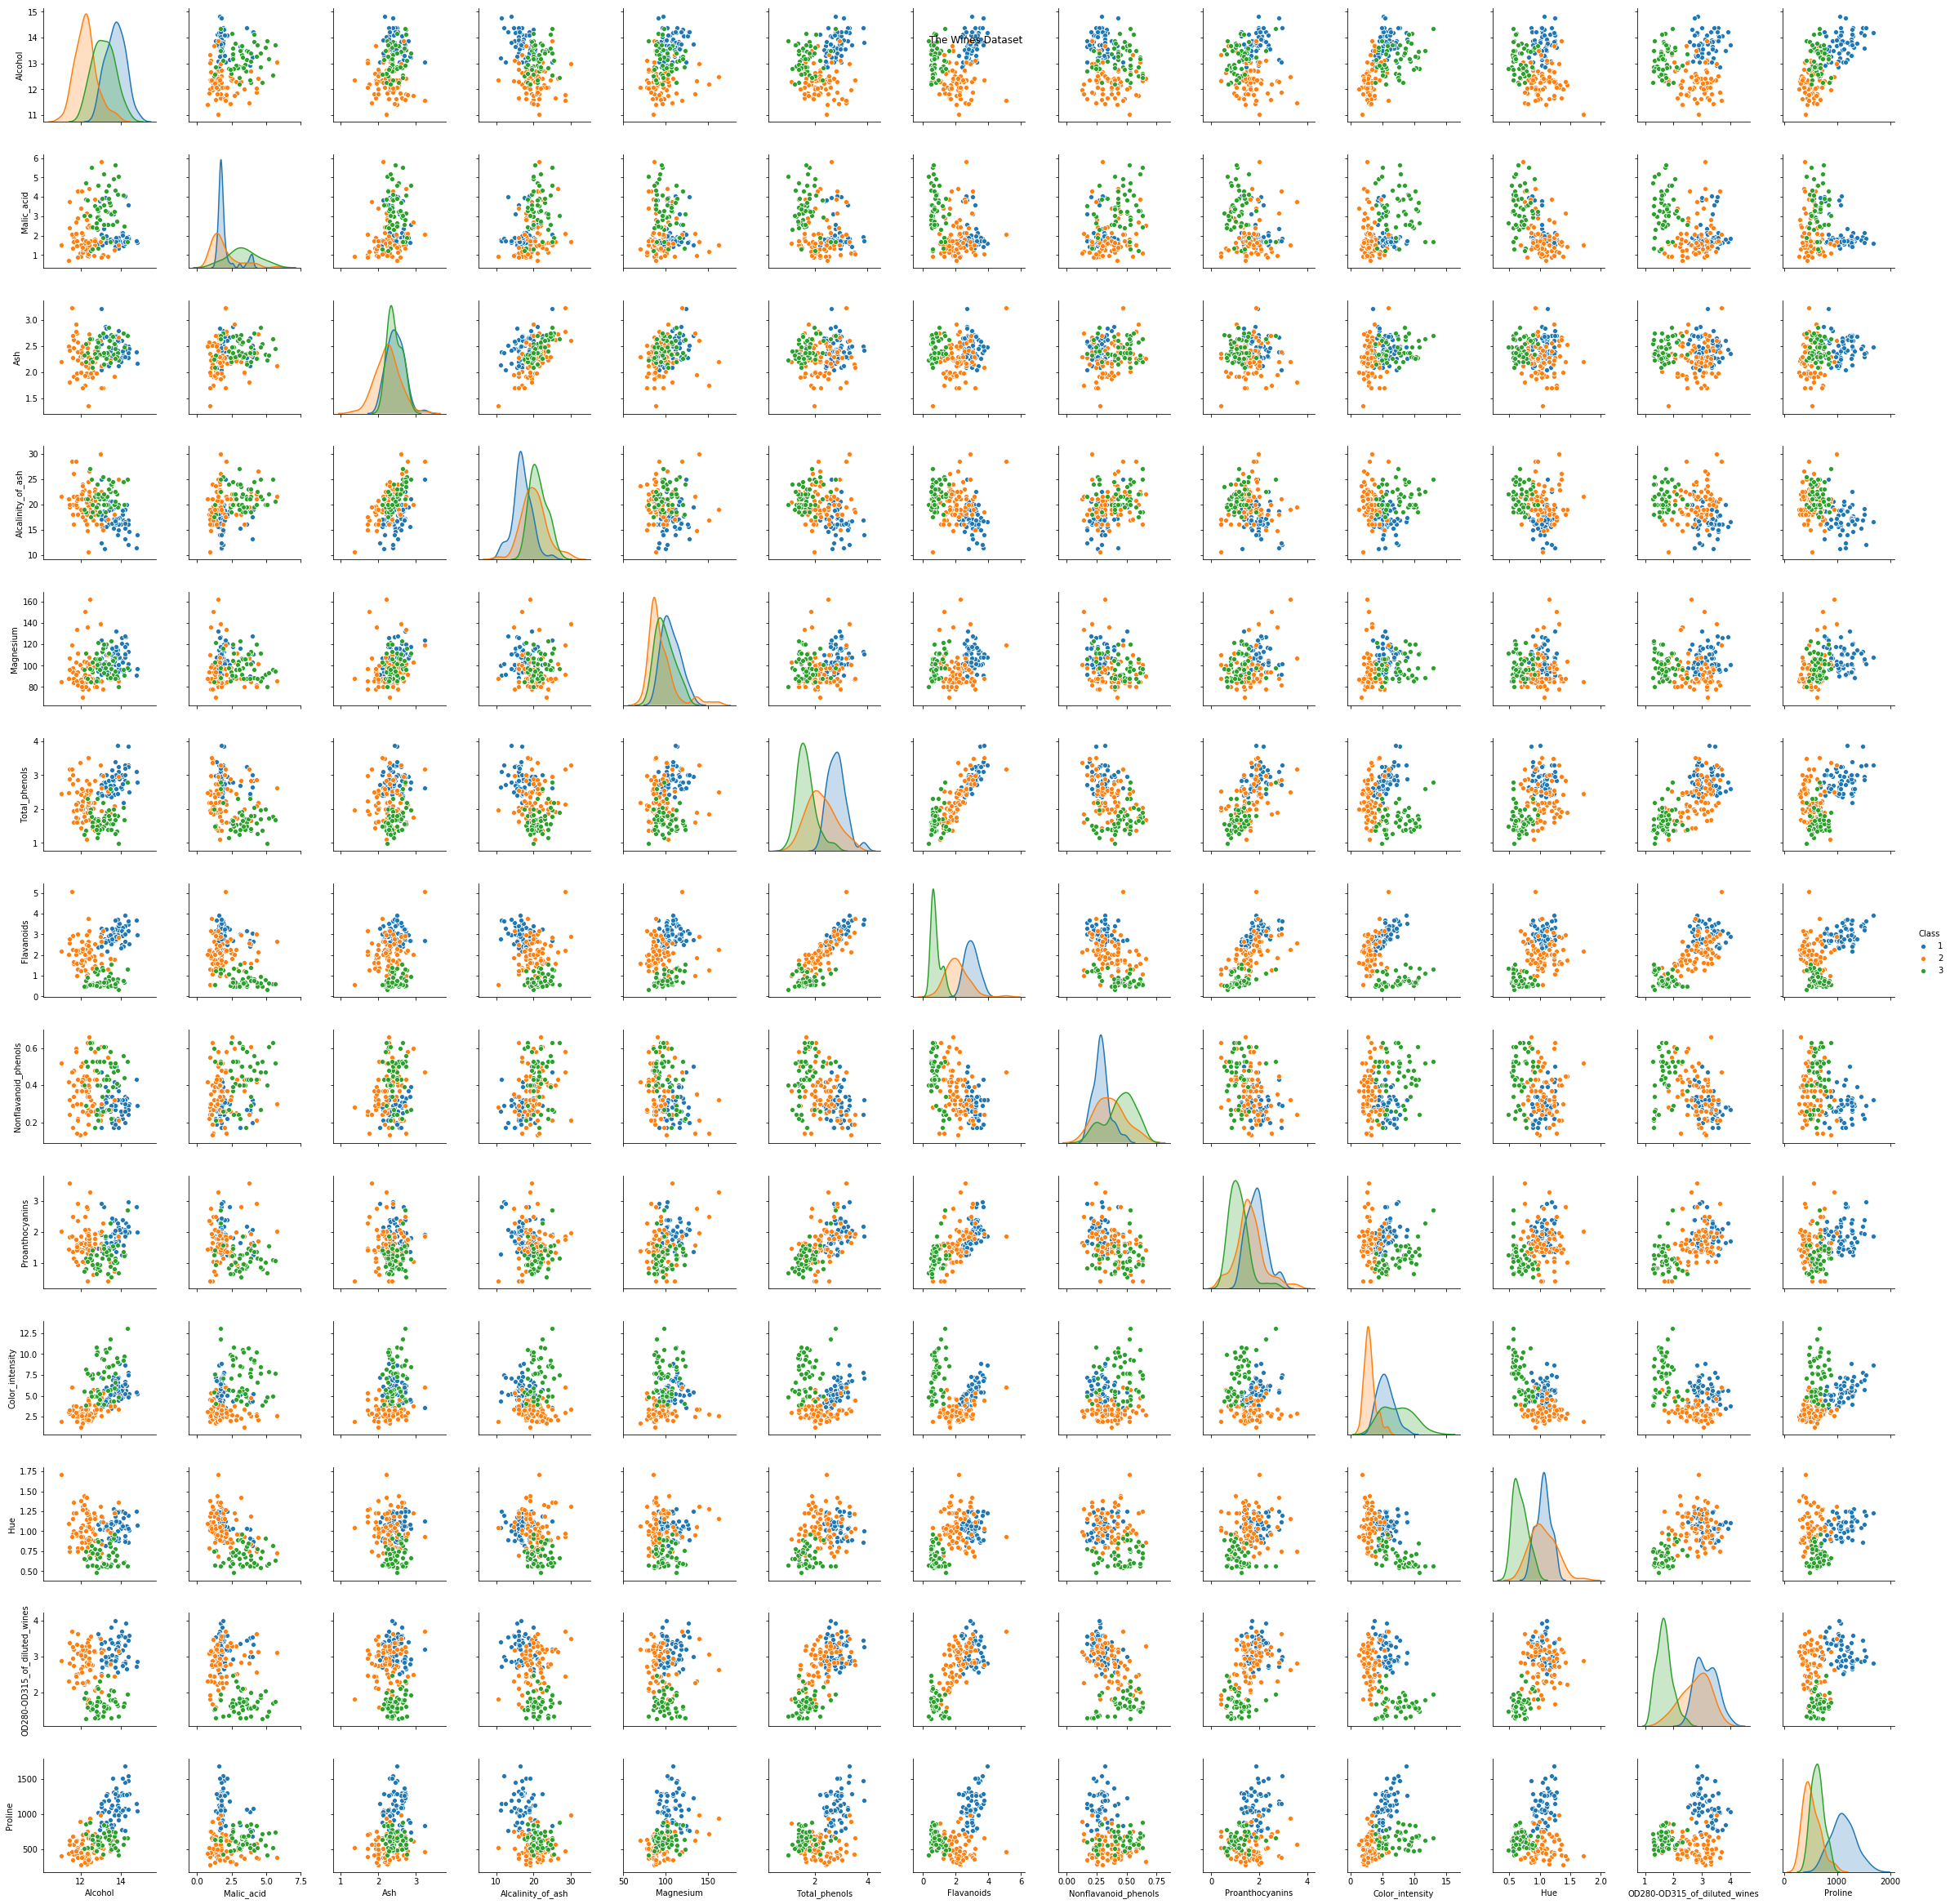

In [13]:
import seaborn as sns

g = sns.pairplot(df, hue="Class", vars=["Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280-OD315_of_diluted_wines", "Proline"])
g.fig.suptitle('The Wines Dataset')